# Rechnerarithmetik
Dieses Kapitel beschäftigt sich damit, wie Zahlen dargestellt werden, was für Fehler dabei entstehen können und wie sich diese bei Operationen fortpflanzen.

Lernziele:
- Sie verstehen die Definition der maschinendarstellbaren Zahlen.
- Sie können die Fehler, die beim Abbilden von reellen Zahlen auf Maschinenzahlen entstehen, sowie die Maschinengenauigkeit berechnen.
- Sie können die Fortpflanzung von Fehlern bei Funktionsauswertungen abschätzen und die Konditionszahl berechnen.

## Maschinenzahlen

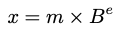

m = Mantisse, e = Exponent und B = Basis

(Computerintern wird üblicherweise die Basis B = 2 - für Binär - verwendet "1" und "0").

Aufgabe 2.1:
- Überlegen Sie sich: wie viele verschiedene Möglichkeiten gibt es, mit Binärzahlen ein Byte zu füllen?

$2^{8} = 256 Möglichkeiten$ (Wegen 1 Byte hat 8 Bits)

- Wie viele Ziffern bräuchten Sie im Hexadezimalsystem, um die gleiche Anzahl Möglichkeiten zu erhalten?

2 Ziffern, da $16^{2} = 256$

- Was folgern Sie daraus bzgl. der Vorteile des Hexadezimalsystems?

Ein Byte im Binärsystem kann durch 2 Ziffern im Hexadezimalsystem ersetzt werden. Lange binäre Zeichenketten lassen sich also im Hexade- zimalsystem sehr kompakt darstellen, wobei jeweils Gruppen mit 4 Bits durch eine Hexadezimal-Ziffer ersetzt werden kann.

Der exponent definiert die Position des Dezimalpunktes:

$x = 112.78350 = 112.78350 * 10^{0} = 1127835.0 * 10^{-4} = 0.11278350 * 10^{3}$

Wenn der Exponent:
- Positiv ist, dann geht die Kommastelle nach LINKS.
- Negativ ist, dann get die Kommastelle nach RECHTS.

## Approximations- und Rundungsfehler

### Rundungsfehler und Maschinengenauigkeit

### Fehlerfortpflanzung bei Funtionsauswertungen / Konditionierung

# Numerische Lösung von Nullstellenproblemen

## Fixpunktiteration

## Newton Verfahren

### Vereinfachtes Newton Verfahren

### Sekantenverfahren

## Konvergenzgeschwindigkeit

## Fehlerabschätzung

# Numerische Lösung linearer Gleichungssysteme

## Gaussalgorithmus

## Fehlerfortpflanzung beim Gauss-Algorithmus und Pivotisierung

## Dreieckszerlegung von Matrizen